In [2]:
# adapted from https://muon-tutorials.readthedocs.io/en/latest/cite-seq/1-CITE-seq-PBMC-5k.html

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import sys
import os
from pathlib import Path
import muon as mu
import mudatasets as mds
import seaborn as sns
from muon import prot as pt

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep

In [39]:
mdata = mds.load("pbmc5k_citeseq", data_dir=prep.basedir, full=True)

■ File filtered_feature_bc_matrix.h5 from pbmc5k_citeseq has been found at /Users/ggayq/projects/cellenium/scratch/pbmc5k_citeseq/filtered_feature_bc_matrix.h5
■ Checksum is validated (md5) for filtered_feature_bc_matrix.h5
■ File minipbcite.h5mu from pbmc5k_citeseq has been found at /Users/ggayq/projects/cellenium/scratch/pbmc5k_citeseq/minipbcite.h5mu
■ Checksum is validated (md5) for minipbcite.h5mu
■ File pbmc5k_citeseq_processed.h5mu from pbmc5k_citeseq has been found at /Users/ggayq/projects/cellenium/scratch/pbmc5k_citeseq/pbmc5k_citeseq_processed.h5mu


/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudatasets/core.py:69: UserWarning: ■ Checksum does not match (md5), will re-download pbmc5k_citeseq_processed.h5mu
  warn(
100%|█████████████████████████████████████████████████████████████| 46866/46866 [01:01<00:00, 757.25it/s, 385.4MiB, pbmc5k_citeseq_processed.h5mu, pbmc5k_citeseq]
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudatasets/core.py:203: UserWarning: Dataset is in the 10X .h5 format and can't be loaded as backed.
  warn("Dataset is in the 10X .h5 format and can't be loaded as backed.")


■ Loading filtered_feature_bc_matrix.h5...


/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:446: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future versio

In [40]:
safe_copy = mdata.copy()

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:446: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future versio

In [84]:
mdata = safe_copy.copy()

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:446: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:671: FutureWarning: In a future versio

In [85]:
mdata.mod['prot'].var_names_make_unique()
mdata.mod['prot'].var_names = [ele.split('_')[0] for ele in mdata.mod['prot'].var_names]

In [86]:
mdata.mod['rna'].var_names_make_unique()

In [87]:
mdata = mu.MuData({'prot':mdata.mod['prot'],'rna':mdata.mod['rna']})

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.l

# Protein/antibody

In [89]:
prot = mdata.mod['prot']

In [90]:
prot.layers['counts'] = prot.X

In [91]:
# normalize
pt.pp.clr(prot)

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/muon/_prot/preproc.py:214: UserWarning: adata.X is sparse but not in CSC format. Converting to CSC.
  warn("adata.X is sparse but not in CSC format. Converting to CSC.")


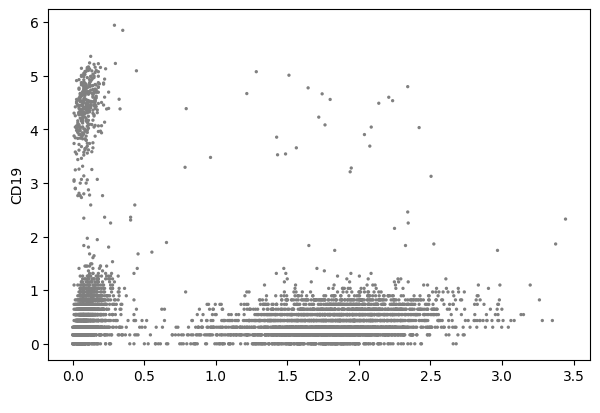

In [121]:
sc.pl.scatter(prot, x="CD3", y="CD19")

# Downstream analysis

In [93]:
sc.tl.pca(prot)

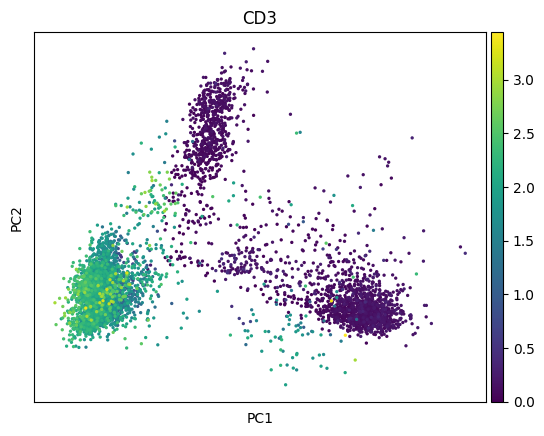

In [122]:
sc.pl.pca(prot, color='CD3')

In [123]:
# clustering
sc.pp.neighbors(prot)
sc.tl.leiden(prot, resolution=.5)

In [124]:
# umap
sc.tl.umap(prot, random_state=1)

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


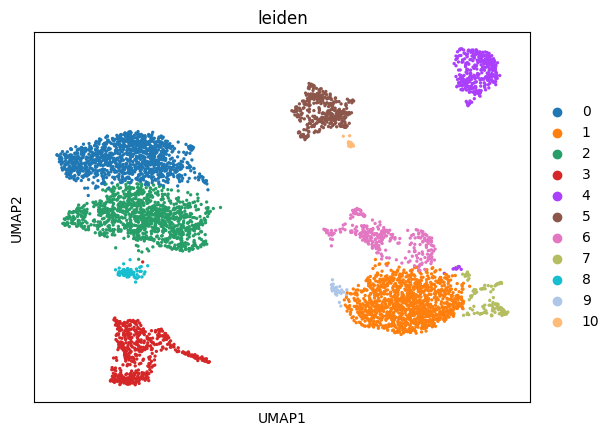

In [125]:
sc.pl.umap(prot, color='leiden')

In [126]:
prep.remove_raw_and_layers(prot)

In [98]:
prot.obs['leiden_by_prot'] = prot.obs.leiden.astype("str").values
prot.obs.leiden_by_prot = prot.obs.leiden_by_prot.astype("category")

In [99]:
prep.calculate_differentially_expressed_genes(prot, ['leiden_by_prot'])

diff.exp. genes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]
20230226-155816.337 3372 INFO root:359 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['leiden_by_prot']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,CD27,38.133255,2.638560,0.000000e+00,0.000000e+00,0,_OTHERS_,leiden_by_prot
1,CD3,33.497448,2.038088,5.250408e-246,8.400652e-245,0,_OTHERS_,leiden_by_prot
2,CD4,29.430212,1.857720,2.255797e-190,1.443710e-189,0,_OTHERS_,leiden_by_prot
3,CD197,27.397385,0.683702,2.946612e-165,1.347022e-164,0,_OTHERS_,leiden_by_prot
4,CD278,22.870260,0.904049,9.188326e-116,2.940264e-115,0,_OTHERS_,leiden_by_prot
...,...,...,...,...,...,...,...,...
107,CD69,2.890421,1.115114,3.847267e-03,6.071697e-03,10,_OTHERS_,leiden_by_prot
108,CD80,2.864150,0.772897,4.181300e-03,6.071697e-03,10,_OTHERS_,leiden_by_prot
109,CD25,2.837013,0.964349,4.553773e-03,6.071697e-03,10,_OTHERS_,leiden_by_prot
110,CD45RO,2.118323,0.750981,3.414769e-02,4.370904e-02,10,_OTHERS_,leiden_by_prot


# RNA

In [100]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 5247 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

In [101]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [102]:
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 3)

In [103]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))
# Same as the following but doesn't copy the object
#   sc.pp.filter_cells(rna, min_genes=200)
#   rna = rna[rna.obs.n_genes_by_counts < 5000, :]

mu.pp.filter_obs(rna, 'total_counts', lambda x: (x > 1500) & (x < 15000))
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 20)

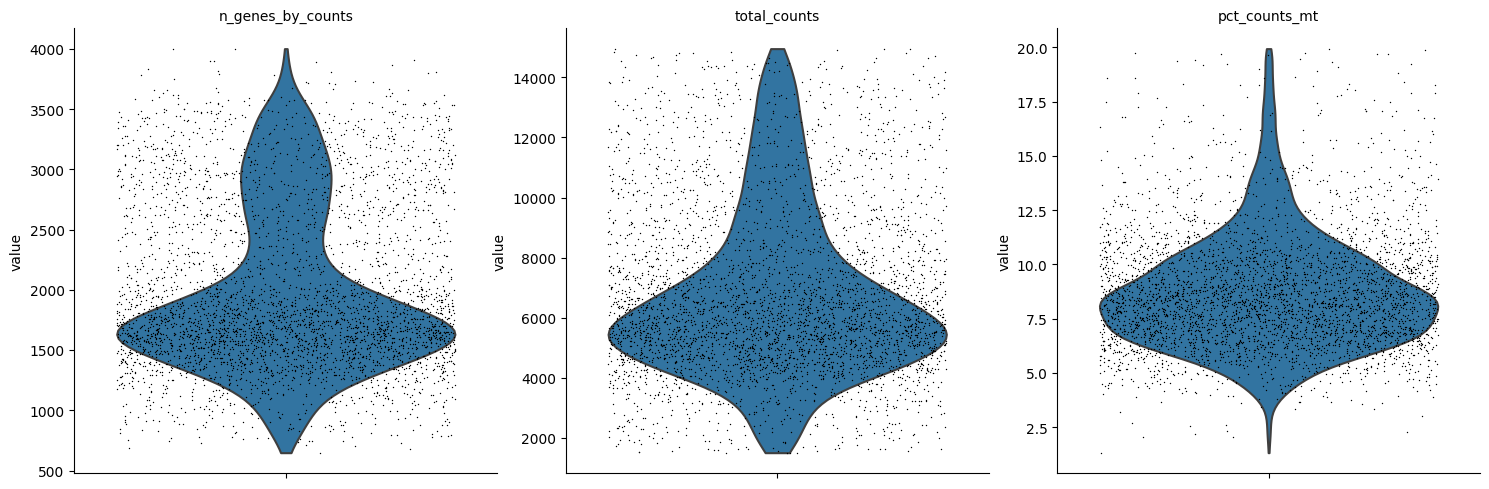

In [104]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)


In [105]:
# normalize
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

In [106]:
# feature selection
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

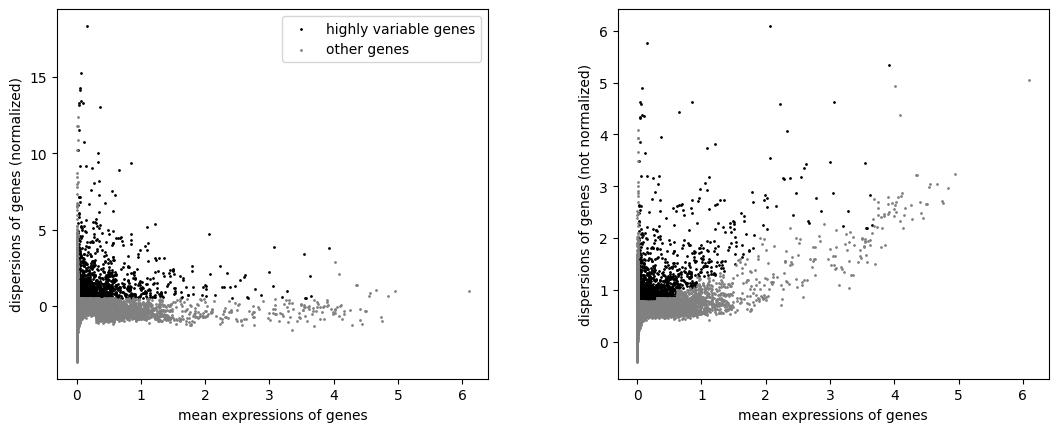

In [107]:
sc.pl.highly_variable_genes(rna)

In [108]:
rna.raw = rna

In [109]:
sc.pp.scale(rna, max_value=10)

In [110]:
# pca
sc.tl.pca(rna, svd_solver='arpack')

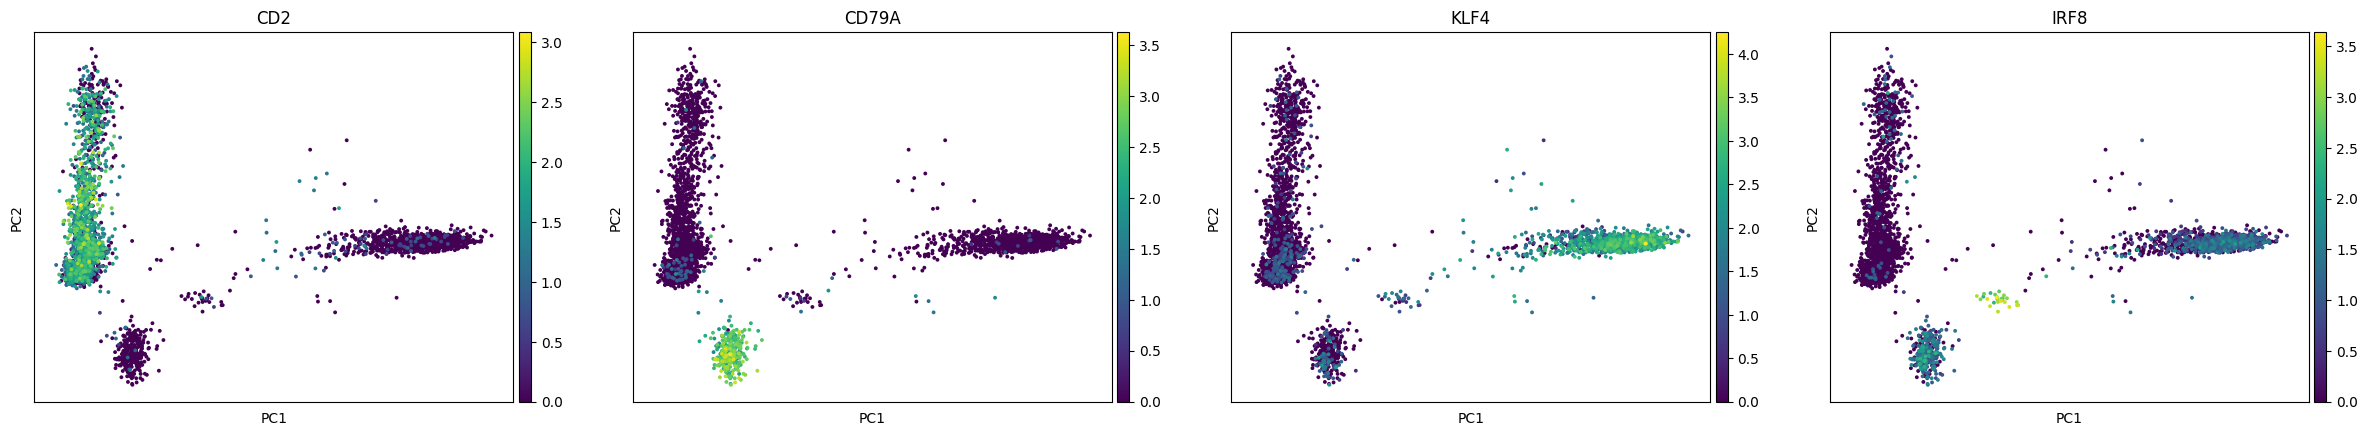

In [111]:
sc.pl.pca(rna, color=['CD2', 'CD79A', 'KLF4', 'IRF8'])

In [112]:
# clustering
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=20)
sc.tl.leiden(rna, resolution=.75)

In [113]:
# umap
sc.tl.umap(rna, spread=1., min_dist=.5, random_state=11)

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


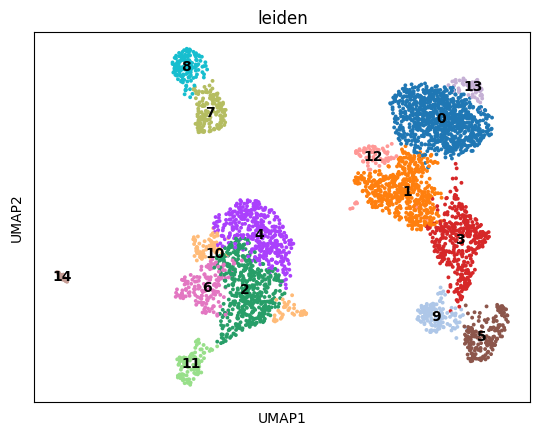

In [114]:
sc.pl.umap(rna, color="leiden", legend_loc="on data")

In [115]:
rna.obs['leiden_by_rna'] = rna.obs.leiden.astype("str").values
rna.obs.leiden_by_rna = rna.obs.leiden_by_rna.astype("category")

In [116]:
rna.X = rna.raw.X

In [117]:
prep.calculate_differentially_expressed_genes(rna, ['leiden_by_rna'])

diff.exp. genes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.62s/it]
20230226-155838.401 3372 INFO root:359 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['leiden_by_rna']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,RPS3A,40.528389,1.213527,0.000000e+00,0.000000e+00,0,_OTHERS_,leiden_by_rna
1,RPL30,40.029041,1.139426,0.000000e+00,0.000000e+00,0,_OTHERS_,leiden_by_rna
2,RPL32,39.947823,1.192528,0.000000e+00,0.000000e+00,0,_OTHERS_,leiden_by_rna
3,RPS6,38.817921,1.291797,0.000000e+00,0.000000e+00,0,_OTHERS_,leiden_by_rna
4,RPL9,38.685474,1.152709,0.000000e+00,0.000000e+00,0,_OTHERS_,leiden_by_rna
...,...,...,...,...,...,...,...,...
1413,GSN,6.716093,3.461574,1.866617e-11,3.195864e-09,14,_OTHERS_,leiden_by_rna
1414,OPN3,6.676164,4.296686,2.452784e-11,4.159455e-09,14,_OTHERS_,leiden_by_rna
1415,TXN,6.656747,2.397043,2.799537e-11,4.702694e-09,14,_OTHERS_,leiden_by_rna
1416,TRAF4,6.629649,5.456068,3.364852e-11,5.566711e-09,14,_OTHERS_,leiden_by_rna


In [118]:
prep.remove_raw_and_layers(rna)

In [119]:
prep.set_cellenium_metadata(
    mdata,
    title='PBMC5k multiomics',
    description='Peripheral blood mononuclear cells (PBMCs) provided by 10x Genomics',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12434'],
    mesh_disease_ids=[],
    X_pseudolayer_name='norm_log_expression',
    modalities = {'prot':'protein_antibody_tag','rna':'gene'},
    main_sample_attributes={'prot':['leiden_by_prot'], 'rna': ['leiden_by_rna']}
)

In [120]:
mdata.write(prep.basedir / "pbmc3k_processed.h5mu")

/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/Users/ggayq/opt/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:578: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.l